<a href="https://colab.research.google.com/github/susimartins2014-glitch/python_analise_dados_restaurante/blob/main/drinks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
import matplotlib.pyplot as plt


In [3]:
# Ler planilha clientes atendidos

df1 = pd.read_excel('dados_drink.xlsx', sheet_name='Por_Canal')
df1

,Estabelecimento,Data,Dia,Modo,Integracao,Tabela_Preco,N_Pessoas
0,JAPPA DA QUITANDA - ANÁLIA FRANCO,2025-08-01,Sexta,Salão,0,0,201
1,JAPPA DA QUITANDA - ANÁLIA FRANCO,2025-08-02,Sábado,Salão,0,0,266
2,JAPPA DA QUITANDA - ANÁLIA FRANCO,2025-08-03,Domingo,Salão,0,0,234
3,JAPPA DA QUITANDA - ANÁLIA FRANCO,2025-08-04,Segunda,Salão,0,0,231
4,JAPPA DA QUITANDA - ANÁLIA FRANCO,2025-08-05,Terça,Salão,0,0,213
...,...,...,...,...,...,...,...
163,JAPPA DA QUITANDA - BARRA SHOPPING,2025-09-23,Terça,Salão,0,1,210
164,JAPPA DA QUITANDA - BARRA SHOPPING,2025-09-24,Quarta,Salão,0,0,263
165,JAPPA DA QUITANDA - BARRA SHOPPING,2025-09-24,Quarta,Salão,0,1,255
166,JAPPA DA QUITANDA - BARRA SHOPPING,2025-09-25,Quinta,Salão,0,0,266


In [4]:
# Ler planilha com quantidade de  pedidos

df2 = pd.read_excel('dados_drink.xlsx', sheet_name='Consumo_Produtos')
df2

,Estabelecimento,Cod,Categoria,Descricao,Quant,T_ Categoria
0,JAPPA DA QUITANDA - ANÁLIA FRANCO,2000,RENTRADA,R SUNOMONO,0,RODIZIO
1,JAPPA DA QUITANDA - ANÁLIA FRANCO,2001,RENTRADA,R CAMARAO CATUPIRY,0,RODIZIO
2,JAPPA DA QUITANDA - ANÁLIA FRANCO,2002,RENTRADA,R CROQUETA SALMAO TERIYAKI,0,RODIZIO
3,JAPPA DA QUITANDA - ANÁLIA FRANCO,2003,R PRATOS QUENTES,R MIX DE COGUMELOS,0,RODIZIO
4,JAPPA DA QUITANDA - ANÁLIA FRANCO,2004,RENTRADA,R TEMPURA LEGUMES,0,RODIZIO
...,...,...,...,...,...,...
809,JAPPA DA QUITANDA - BARRA SHOPPING,3740,CERVEJA,DIAS DOS PAIS STELLA PURE GOLD,0,CERVEJAS
810,JAPPA DA QUITANDA - BARRA SHOPPING,3741,SOFT DRINKS,SPRITE,30,SOFT DRINKS
811,JAPPA DA QUITANDA - BARRA SHOPPING,3742,SOFT DRINKS,SPRITE ZERO,11,SOFT DRINKS
812,JAPPA DA QUITANDA - BARRA SHOPPING,3744,VINHO TINTO,ICHANKA MALBEC,0,VINHOS


In [5]:
df2['T_ Categoria']

,T_ Categoria
0,RODIZIO
1,RODIZIO
2,RODIZIO
3,RODIZIO
4,RODIZIO
...,...
809,CERVEJAS
810,SOFT DRINKS
811,SOFT DRINKS
812,VINHOS


In [7]:
# Filtrando por categoria desejada

df2 = df2[df2['T_ Categoria'].isin(['DRINKS', 'SOFT DRINKS'])]
df2

,Estabelecimento,Cod,Categoria,Descricao,Quant,T_ Categoria
158,JAPPA DA QUITANDA - ANÁLIA FRANCO,3103,SOFT DRINKS,AGUA COM GAS,267,SOFT DRINKS
159,JAPPA DA QUITANDA - ANÁLIA FRANCO,3104,SOFT DRINKS,AGUA SEM GAS,318,SOFT DRINKS
160,JAPPA DA QUITANDA - ANÁLIA FRANCO,3105,SOFT DRINKS,COCA COLA,272,SOFT DRINKS
161,JAPPA DA QUITANDA - ANÁLIA FRANCO,3106,SOFT DRINKS,COCA COLA ZERO,281,SOFT DRINKS
162,JAPPA DA QUITANDA - ANÁLIA FRANCO,3107,SOFT DRINKS,GUARANA ANTARCTICA,257,SOFT DRINKS
...,...,...,...,...,...,...
802,JAPPA DA QUITANDA - BARRA SHOPPING,3667,SOFT DRINKS,MONSTER ENERGY,3,SOFT DRINKS
803,JAPPA DA QUITANDA - BARRA SHOPPING,3668,DRINKS AUTORAIS,DRINK MONSTER MANGO LOCO,10,DRINKS
807,JAPPA DA QUITANDA - BARRA SHOPPING,3704,SAKES,HAKUSHIKA JUNMAI CHOKARA 720ML,1,DRINKS
810,JAPPA DA QUITANDA - BARRA SHOPPING,3741,SOFT DRINKS,SPRITE,30,SOFT DRINKS


In [10]:
# Calucular  total de clientes atendidos por loja

n_pessoas = df1.groupby('Estabelecimento')['N_Pessoas'].sum()
n_pessoas

,N_Pessoas
Estabelecimento,
JAPPA DA QUITANDA - ANÁLIA FRANCO,13088
JAPPA DA QUITANDA - BARRA SHOPPING,26563


In [12]:
# Calcular quantidade de produtos vendidos por loja e categoria

quant = df2.groupby(['Estabelecimento', 'T_ Categoria'])['Quant'].sum()
quant

Estabelecimento                     T_ Categoria
JAPPA DA QUITANDA - ANÁLIA FRANCO   DRINKS          13428
                                    SOFT DRINKS      9433
JAPPA DA QUITANDA - BARRA SHOPPING  DRINKS           1362
                                    SOFT DRINKS     28408
Name: Quant, dtype: int64

In [14]:
# Caulcular quantidade de pedidos por cliente

quant_por_pessoa = quant/ n_pessoas
quant_por_pessoa

Estabelecimento                     T_ Categoria
JAPPA DA QUITANDA - ANÁLIA FRANCO   DRINKS          1.025978
                                    SOFT DRINKS     0.720737
JAPPA DA QUITANDA - BARRA SHOPPING  DRINKS          0.051274
                                    SOFT DRINKS     1.069458
dtype: float64

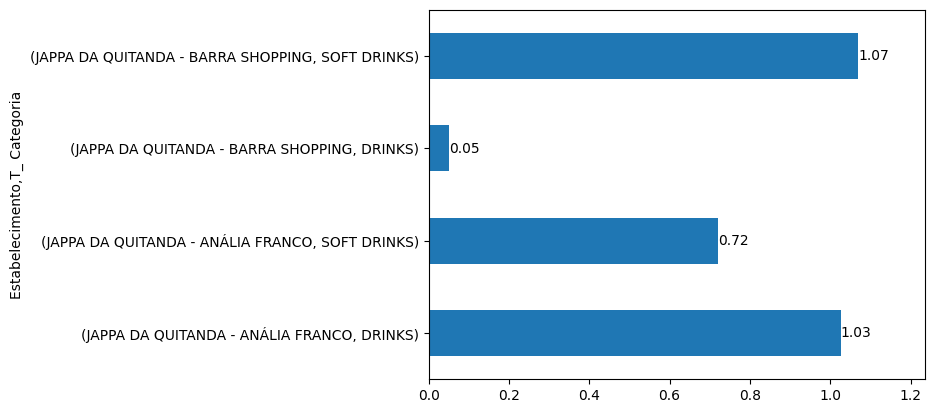

In [15]:
# Plotar gráfico para visualizar resultado

ax = quant_por_pessoa.plot.barh()
ax.bar_label(ax.containers[0], fmt='{:.2f}')
ax.set_xlim(0, ax.get_xlim()[1] * 1.1);



In [26]:
# Mostrar top  5 produtos por loja e categoria

top5 = df2.groupby(['Estabelecimento', 'T_ Categoria','Descricao' ])['Quant'].sum()
top5 = top5.sort_values(ascending=False)
top5 = top5.groupby(['Estabelecimento', 'T_ Categoria']).head(5)
top5 = top5.sort_index()
top5

Estabelecimento                     T_ Categoria  Descricao                              
JAPPA DA QUITANDA - ANÁLIA FRANCO   DRINKS        CARAJILLO 43                                345
                                                  COSMOPOLITAN                                349
                                                  HAKUSHIKA HONJOSO SHU TRADICIONAL 720ML     350
                                                  JIM BEAM                                    346
                                                  MARGARITA                                   344
                                    SOFT DRINKS   CAFE DESCAFEINADO                           349
                                                  MATE DO CHEPH                               681
                                                  MATE MULE                                   333
                                                  SCHWEPPES CITRUS                            595
                                                  SPRITE LEMON FRESH                         1153
JAPPA DA QUITANDA - BARRA SHOPPING  DRINKS        APEROL SPRITZ                               134
                                                  CAIPIRINHA                                   77
                                                  MOSCOW MULE                                  94
                                                  SAKE DO JAPPA TACA                          122
                                                  TANGEBEER                                   111
                                    SOFT DRINKS   AGUA COM GAS                               3799
                                                  AGUA DA CASA                               2334
                                                  AGUA SEM GAS                               2710
                                                  COCA COLA                                  2053
                                                  COCA COLA ZERO                             7551
Name: Quant, dtype: int64